In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('Social_Network_Ads.csv')

In [46]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [47]:
df = df.iloc[:,2:]

In [48]:
df.sample(5)

,Age,EstimatedSalary,Purchased
213,35,58000,0
98,35,73000,0
75,34,112000,1
387,39,71000,0
139,19,25000,0


In [49]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis = 1),df['Purchased'],test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [52]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [53]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


Observe that the mean becomes 0 and standard deviation becomes 1

In [54]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


#Effects of Scaling
see that before scaling the mean is at 40 and after scaling it went to 0 <br>
and the shape remains same

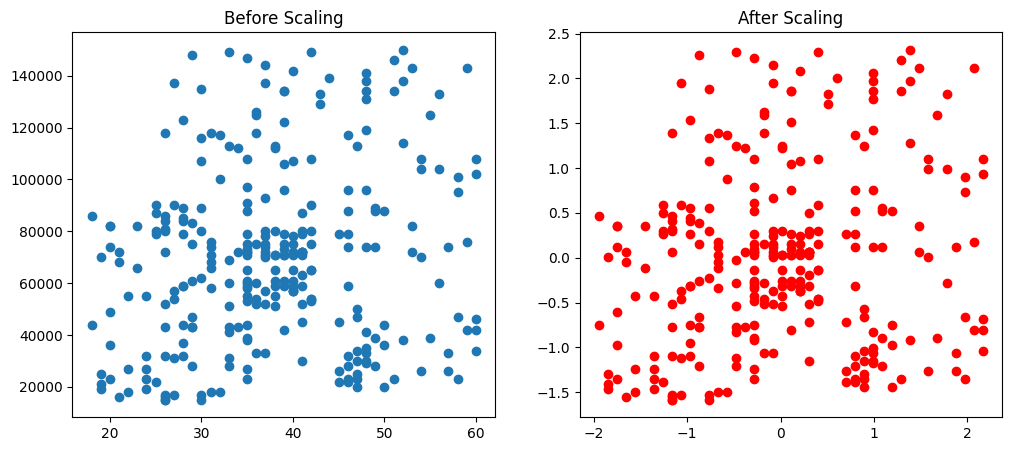

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title('After Scaling')
plt.show()

After Scaling the datasets are comparable

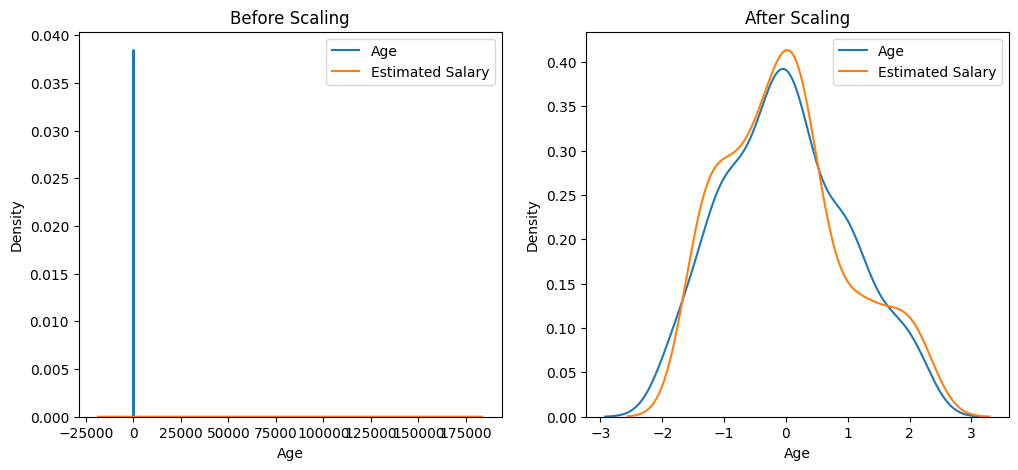

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
sns.kdeplot(X_train['Age'], ax=ax1, label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label='Estimated Salary')

# Set legend for the first subplot
ax1.legend()
ax1.set_title('Before Scaling')

# After Scaling
sns.kdeplot(X_train_scaled['Age'], ax=ax2, label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, label='Estimated Salary')

# Set legend for the second subplot
ax2.legend()
ax2.set_title('After Scaling')

plt.show()


Individually what is the impact of standardization --> NO impact as the shape remains same before and after scaling

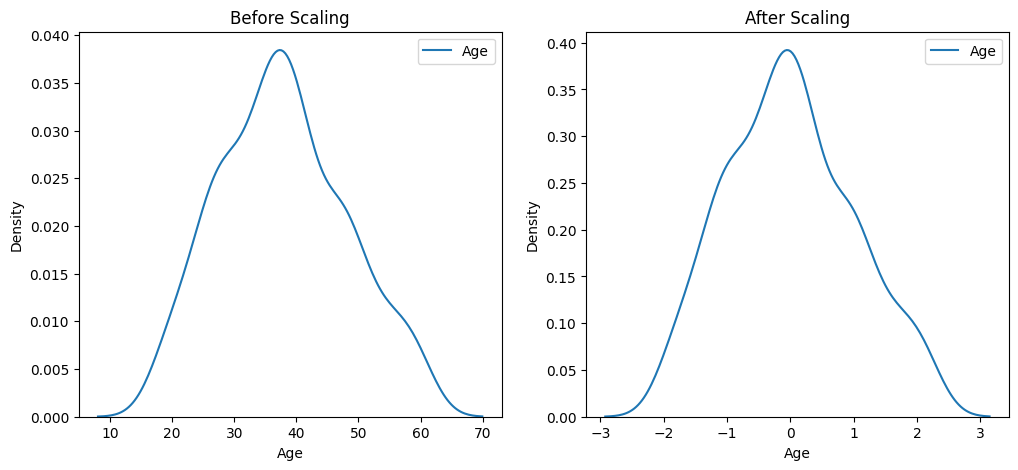

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
sns.kdeplot(X_train['Age'], ax=ax1, label='Age')

# Set legend for the first subplot
ax1.legend()
ax1.set_title('Before Scaling')

# After Scaling
sns.kdeplot(X_train_scaled['Age'], ax=ax2, label='Age')

# Set legend for the second subplot
ax2.legend()
ax2.set_title('After Scaling')

plt.show()

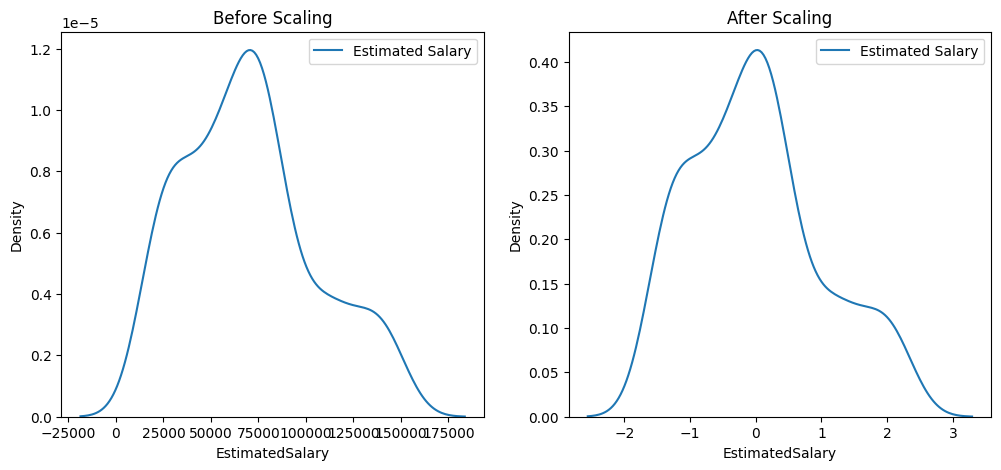

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling

sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label='Estimated Salary')

# Set legend for the first subplot
ax1.legend()
ax1.set_title('Before Scaling')

# After Scaling

sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, label='Estimated Salary')

# Set legend for the second subplot
ax2.legend()
ax2.set_title('After Scaling')

plt.show()

Why Scaling is important
After Scaling the accuracy increases

In [58]:
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression()
lr_scaled  = LogisticRegression()

In [59]:
lr.fit(X_train ,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [71]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
print("Length of y_pred_scaled:", len(y_pred_scaled))

Length of y_test: 120
Length of y_pred: 120
Length of y_pred_scaled: 120


#So the accuracy increases

In [72]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [73]:
dt.fit(X_train ,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [74]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

#So Feature Scaling does not work for DT

In [75]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


#Effects of Outliers
so feature Scaling does nothing to the outliers in the data

In [77]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000, 250000, 350000],'Purchased':[0,1,1]}),ignore_index = True)

<ipython-input-77-65d079c76f60>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000, 250000, 350000],'Purchased':[0,1,1]}),ignore_index = True)


In [78]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


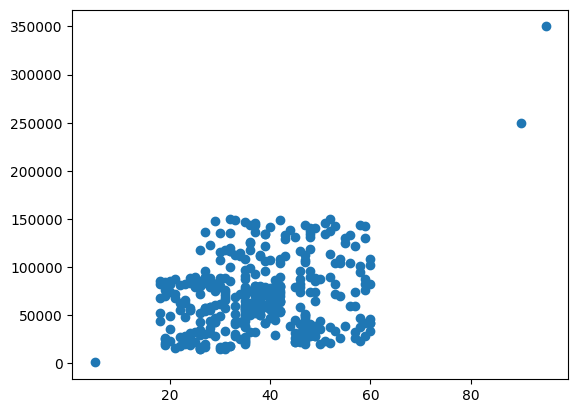

In [79]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [85]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis = 1),df['Purchased'],test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

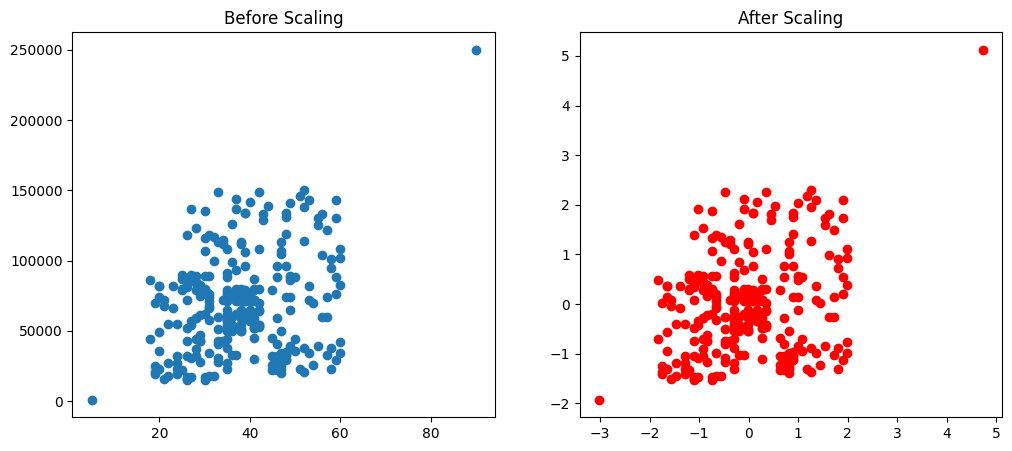

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title('After Scaling')
plt.show()